In [1]:
# %load main.py
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from config import config
import mysql_utils as mysql
import preprocessing
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)
SEASONAL_FREQUENCY = 12*24*7

In [3]:
# DETECTOR_DATA_TABLE = "detector_data_processed_2017"
DETECTOR_ID = "608219"
# DETECTOR_ID = "608106"
# DETECTOR_DATA_QUERY = "SELECT DetectorID, Year, Month, Day, Time, Volume, Occupancy\
#                         FROM {} AS DD NATURAL JOIN detector_health AS DH\
#                         WHERE DetectorID = {} AND Health = 1\
#                         ORDER BY Year, Month, Day, Time;".format(DETECTOR_DATA_TABLE, DETECTOR_ID)

In [4]:
flow = pd.read_csv("data/detector_{}_flow_original.csv".format(DETECTOR_ID), index_col=0, parse_dates=True)

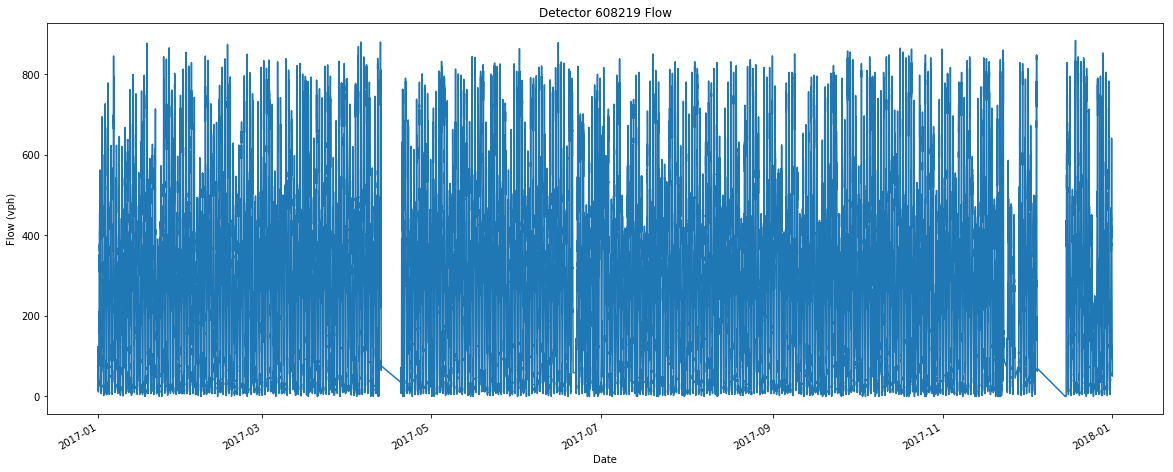

In [5]:
visualization.plot_data_over_time(flow,
                                  title="Detector {} Flow".format(DETECTOR_ID), ylabel="Flow (vph)", figsize=(20, 8))

In [6]:
_, flow_stretch = preprocessing.get_longest_continuous_stretch_of_data(flow, DATA_FREQUENCY)

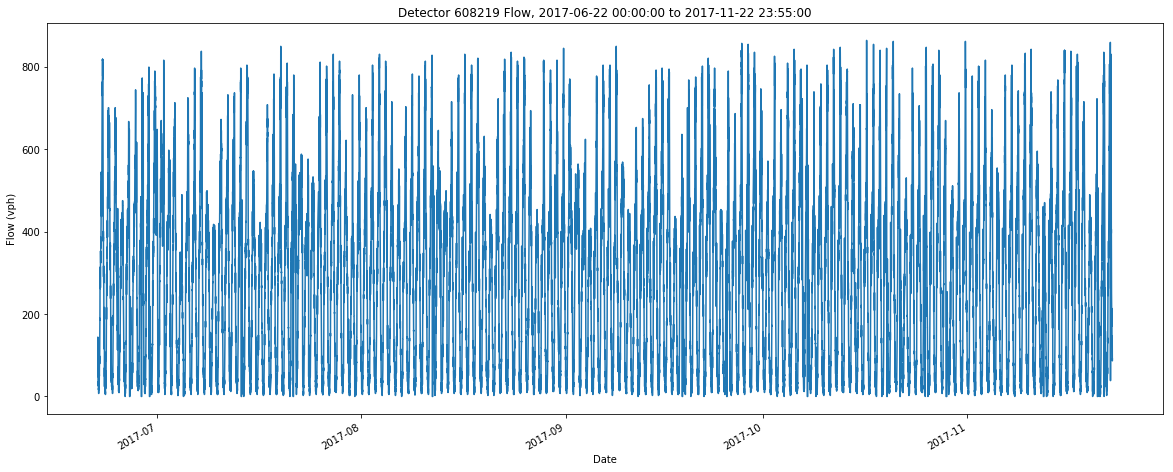

In [7]:
visualization.plot_data_over_time(flow_stretch, title="Detector {} Flow, {} to {}"
                                  .format(DETECTOR_ID, flow_stretch.index[0], flow_stretch.index[-1]),
                                  ylabel="Flow (vph)", figsize=(20, 8))

In [8]:
break_length = preprocessing.get_longest_missing_data_stretch_length(flow, DATA_FREQUENCY)
print("Longest length of continuous missing data, in time units: {}".format(break_length))
print("Longest length of continuous missing data, in number of data: {}".format(break_length / DATA_FREQUENCY))

Longest length of continuous missing data, in time units: 10 days 00:00:00
Longest length of continuous missing data, in number of data: 2880.0


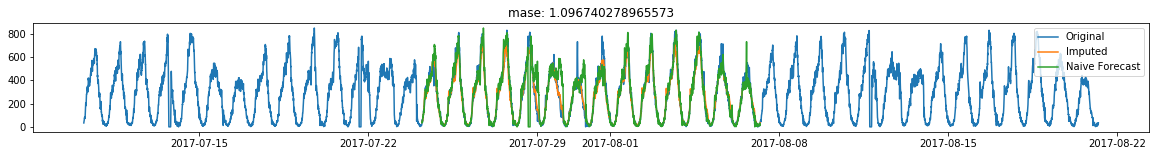

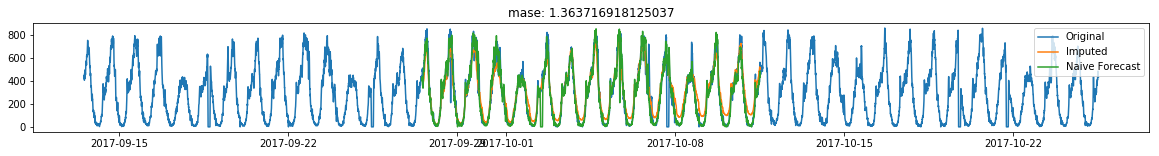

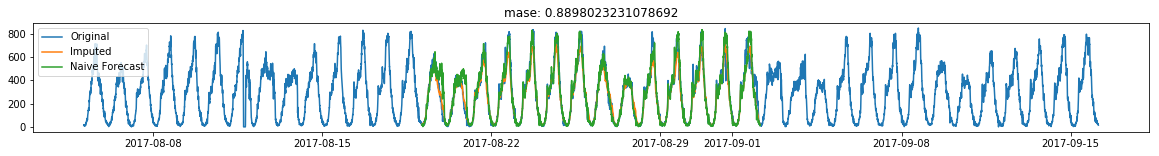

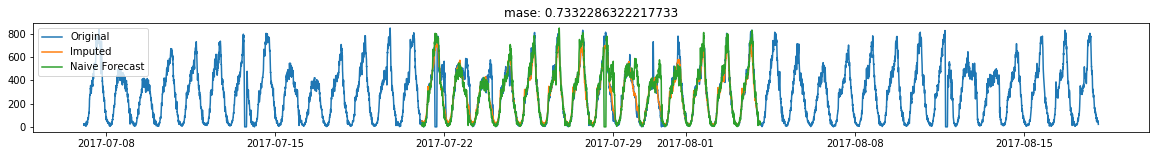

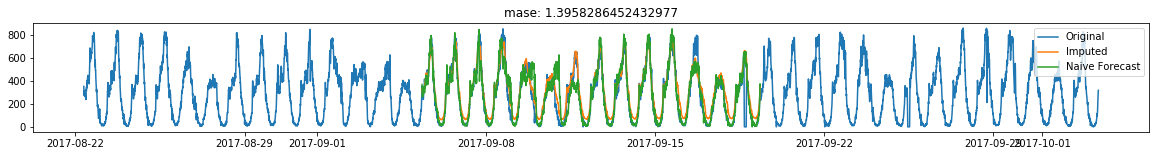

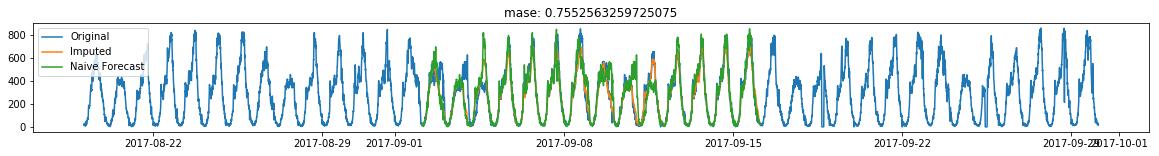

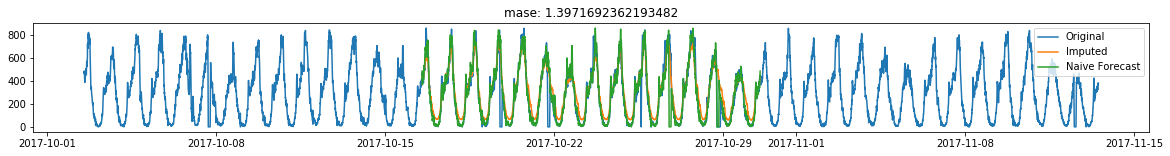

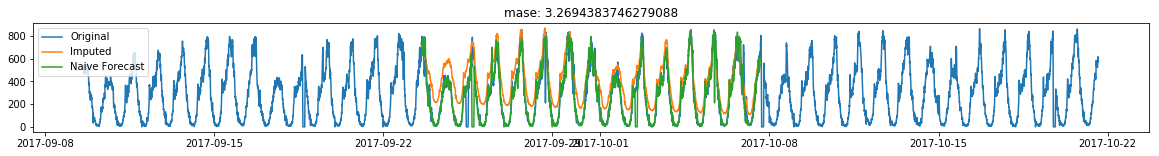

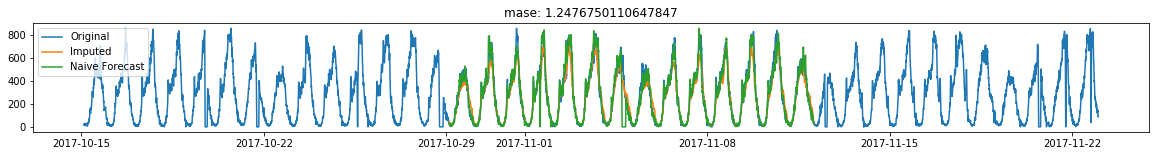

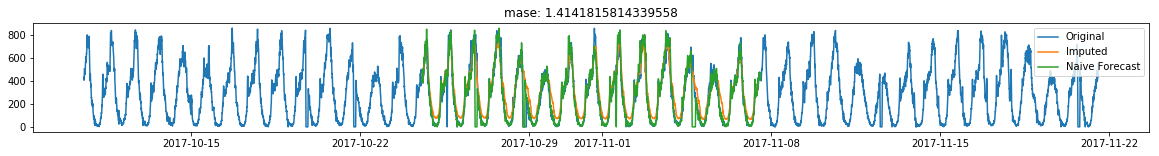

Average MASE: 1.3563037326982057
Individual MASEs: [1.096740278965573, 1.363716918125037, 0.8898023231078692, 0.7332286322217733, 1.3958286452432977, 0.7552563259725075, 1.3971692362193482, 3.2694383746279088, 1.2476750110647847, 1.4141815814339558]


In [9]:
error, errors = preprocessing.test_imputation(flow, DATA_FREQUENCY, SEASONAL_FREQUENCY,
                              preprocessing.seasonal_decomposition_interpolation_imputation,
                              imputation_length=dt.timedelta(weeks=2), imputation_params={'lower_bound': 0}, k=10,
                              error="mase", error_params={"seasonal_freq": SEASONAL_FREQUENCY},
                              graph=True, figsize=(20, 2), graph_zoom=True, graph_naive_forecast=True)
print("Average MASE: {}".format(error))
print("Individual MASEs: {}".format(errors))

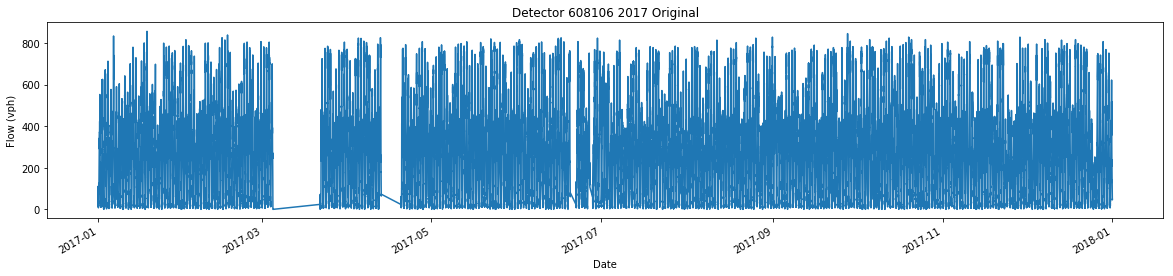

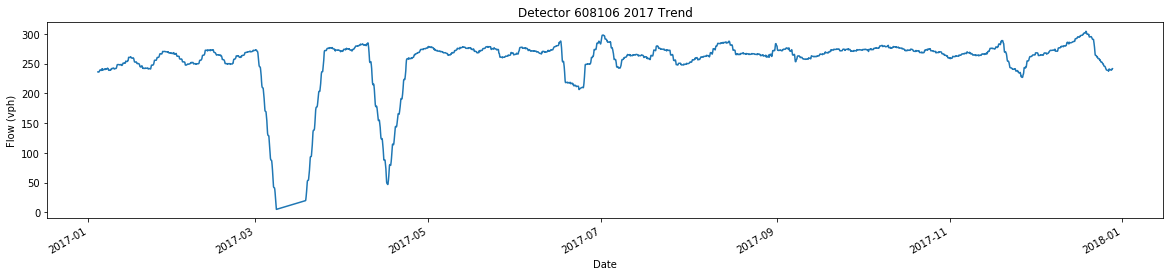

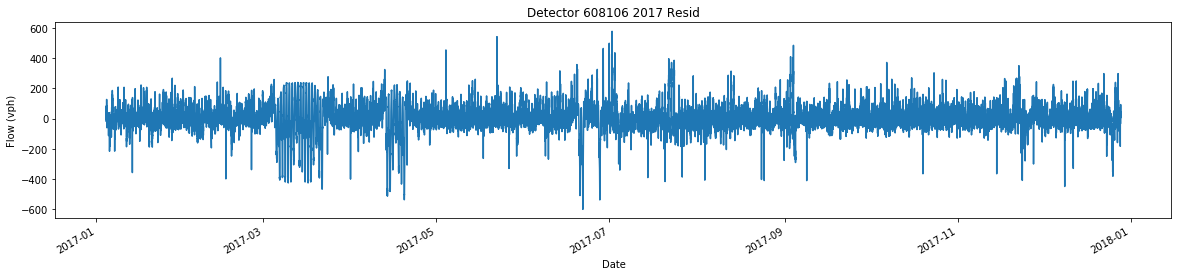

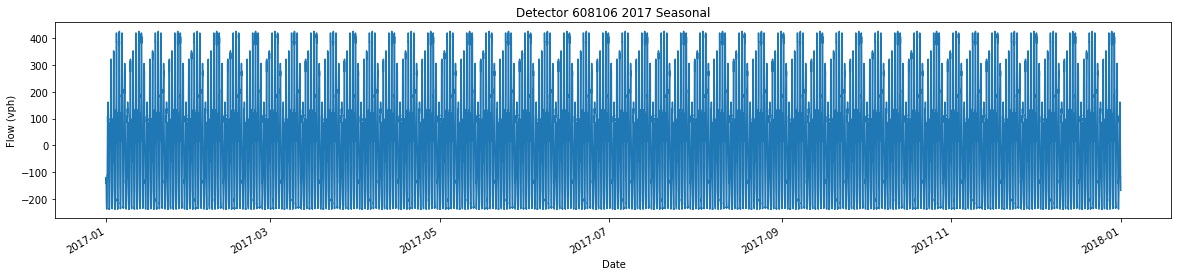

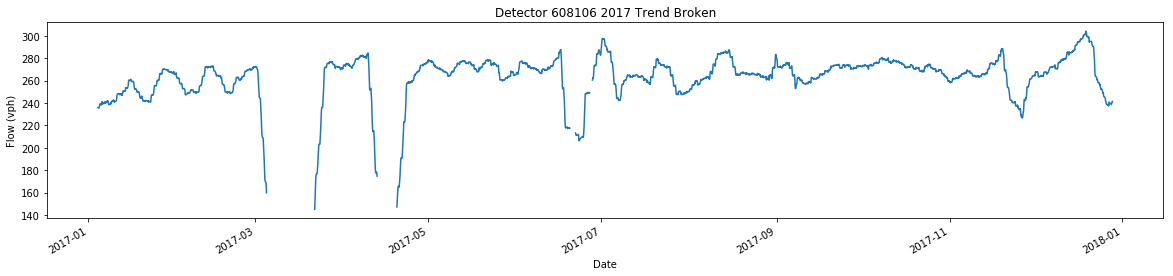

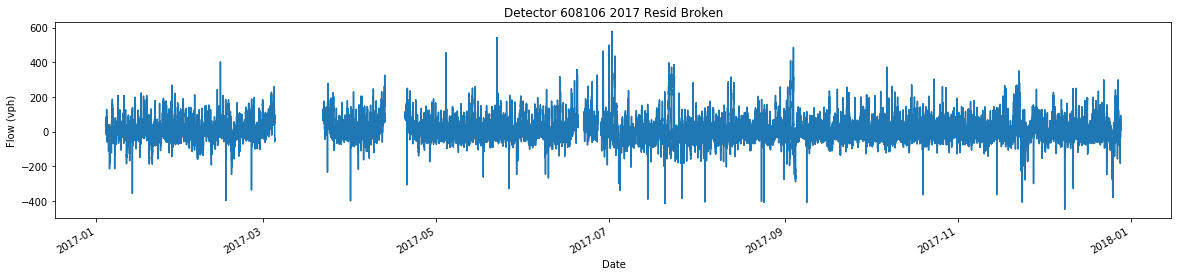

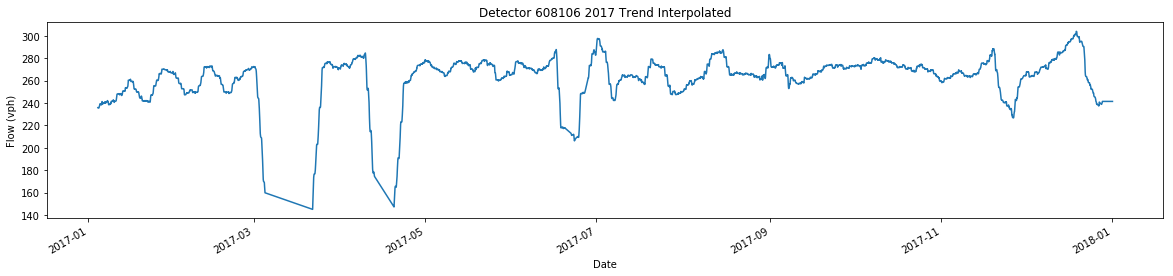

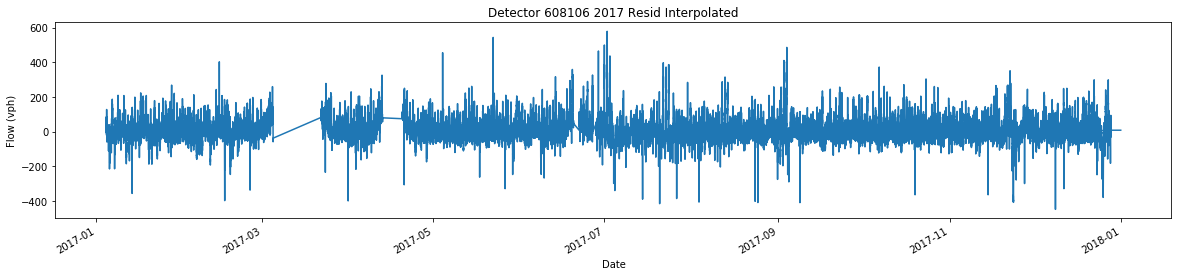

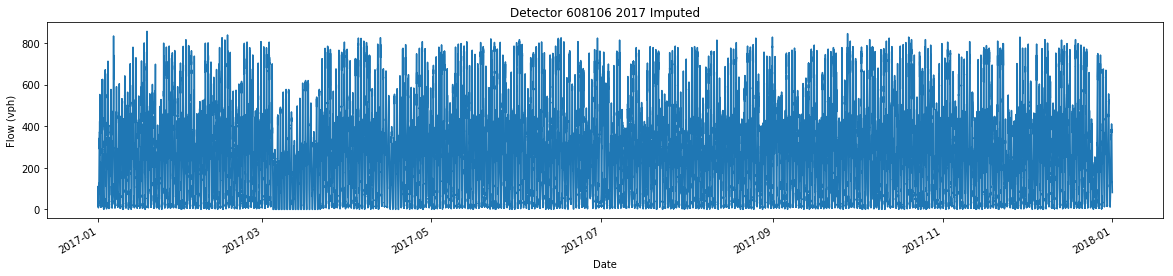

In [18]:
imputed_flow = preprocessing.seasonal_decomposition_linear_interpolation_imputation(flow, DATA_FREQUENCY,
                SEASONAL_FREQUENCY, lower_bound=0, graph=True, title="Detector {} 2017".format(DETECTOR_ID),
                ylabel="Flow (vph)", figsize=(20, 4))

In [11]:
#imputed_flow.to_csv("data/detector_608219_flow_imputed.csv", header=False)